## Example 1-1
The better life index data is downloaded from the [OECD's website](https://stats.oecd.org/index.aspx?DataSetCode=BLI "title").  
The GPD per capita is downloaded from the [IMF's website](https://www.imf.org/external/pubs/ft/weo/2016/01/weodata/weorept.aspx?pr.x=32&pr.y=8&sy=2015&ey=2015&scsm=1&ssd=1&sort=country&ds=.&br=1&c=512%2C668%2C914%2C672%2C612%2C946%2C614%2C137%2C311%2C962%2C213%2C674%2C911%2C676%2C193%2C548%2C122%2C556%2C912%2C678%2C313%2C181%2C419%2C867%2C513%2C682%2C316%2C684%2C913%2C273%2C124%2C868%2C339%2C921%2C638%2C948%2C514%2C943%2C218%2C686%2C963%2C688%2C616%2C518%2C223%2C728%2C516%2C558%2C918%2C138%2C748%2C196%2C618%2C278%2C624%2C692%2C522%2C694%2C622%2C142%2C156%2C449%2C626%2C564%2C628%2C565%2C228%2C283%2C924%2C853%2C233%2C288%2C632%2C293%2C636%2C566%2C634%2C964%2C238%2C182%2C662%2C453%2C960%2C968%2C423%2C922%2C935%2C714%2C128%2C862%2C611%2C135%2C321%2C716%2C243%2C456%2C248%2C722%2C469%2C942%2C253%2C718%2C642%2C724%2C643%2C576%2C939%2C936%2C644%2C961%2C819%2C813%2C172%2C199%2C132%2C733%2C646%2C184%2C648%2C524%2C915%2C361%2C134%2C362%2C652%2C364%2C174%2C732%2C328%2C366%2C258%2C734%2C656%2C144%2C654%2C146%2C336%2C463%2C263%2C528%2C268%2C923%2C532%2C738%2C944%2C578%2C176%2C537%2C534%2C742%2C536%2C866%2C429%2C369%2C433%2C744%2C178%2C186%2C436%2C925%2C136%2C869%2C343%2C746%2C158%2C926%2C439%2C466%2C916%2C112%2C664%2C111%2C826%2C298%2C542%2C927%2C967%2C846%2C443%2C299%2C917%2C582%2C544%2C474%2C941%2C754%2C446%2C698%2C666&s=NGDPDPC&grp=0&a=#download).  

There are some modifications in this example, which are different from the book.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [146]:
# Load the data
oecd_bli = pd.read_csv("oecd_bli_2017.csv")
gdp_per_capita = pd.read_csv("gdp_per_capita_2015.csv", encoding='latin1', delimiter='\t', thousands=',')

In [204]:
# Prepare the data
country_stats = oecd_bli.loc[(oecd_bli.Indicator == 'Life satisfaction') & (oecd_bli.Inequality == 'Total')]\
                    .join(gdp_per_capita.set_index('Country'), on='Country')
country_stats = country_stats[['LOCATION', 'Country', '2015', 'Value']].dropna()
country_stats = country_stats.rename(columns={'2015':'GDP', 'Value':'life_satisfaction'})
country_stats[['GDP', 'life_satisfaction']] = country_stats[['GDP', 'life_satisfaction']].astype(float)
X = np.c_[country_stats.GDP]
y = np.c_[country_stats.life_satisfaction]

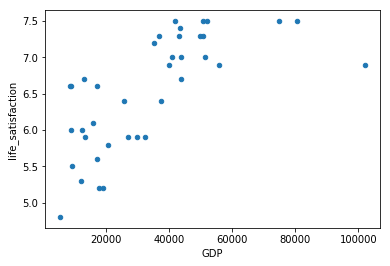

In [206]:
country_stats.plot(kind='scatter', x='GDP', y='life_satisfaction')
plt.show()

In [210]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]] # Cyprus' GDP per capita
print(model.predict(X_new))

[[6.24626328]]


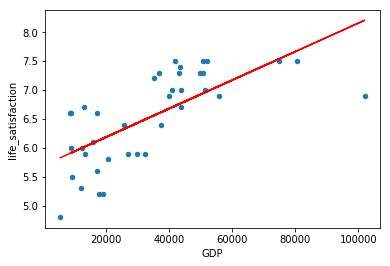

In [213]:
# Plot the linear model
country_stats.plot(kind='scatter', x='GDP', y='life_satisfaction')
plt.plot(X, model.predict(X), color='r')
plt.show()

Thoughts: There are some outliers beyond GDP of over 60,000, which are not included in the example. They might affect the performance of this linear regression model.